# AVIATION RISK ASSESSMENT ANALYSIS(PHASE 1 PROJECT)

##  Project Overview

The aim of this project is to analyze aviation accident data to identify the lowest-risk aircraft for potential purchase by our company. We shall involve data cleaning, imputation, analysis and visualization, culminating in actionable insights and recommendations for business stakeholders.




##  Business Understanding

Our company is expanding into the aviation industry and requires to find out about potential risks linked with different kind of aircraft. Some of the key business questions to ask are:
* What is the distribution of accidents over time?
* What types of aircraft have the highest and lowest risk based on historical accident data?
* What are some of the factors leading to most aviation accidents?

The stakeholders include:
* Head of Aviation division 
* Company Executives

##  Data Understanding
### Data Source and Description
The dataset is sourced from the National Transportation Safety Board covering aviation incidents from 1962 to 2023.
It is contains over 80,000 aviation accident records detailing  _the date of their event,aircraft type, severity of the accident, number of casualties and fatalities and more_.
The data is stored in a `.csvfile` named `AviationData.csv`.


##  Data Preparation


We shall first import relevant libraries needed to work on the dataset.

In [1033]:
# Importing libraries we will work with

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next step will be loading the data.

In [1034]:
# Load data
df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')

C:\Users\user\AppData\Local\Temp\ipykernel_37868\1585802667.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')


In [1035]:
# Checking the dataset content
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


The dataset contains 88889 rows and 31 columns.

In [1036]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Below we will see what columns are contained in the dataset.

In [1037]:
columns = df.columns
columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [1038]:
# Checking information in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [1039]:
# Shape of the dataset
df.shape

(88889, 31)

In the cell below we use the `describe` function to carry out a statistical overview of our data, specifically those columns containing numerical values.

In [1040]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Data Cleaning
Our next step will be preparing our data for cleaning. Identifying various things such as mixed data types,missing values, duplicates will be crucial in this phase.

#### Handling mixed data types
In the cell below we will create a function to check for columns with mixed types of data and their unique types.

In [1041]:
# Checking for columns with mixed data types

# Function to identify mixed data types in a column
def check_mixed_types(column):
    types = column.apply(type).unique()
    return len(types) > 1

# Applying the function to each column
mixed_type_columns = {col: df[col].apply(type).unique() for col in columns if check_mixed_types(df[col])}

# Displaying columns with mixed data types and their unique types
for col, types in mixed_type_columns.items():
    print(f"Column '{col}' has mixed types: {types}")

Column 'Location' has mixed types: [<class 'str'> <class 'float'>]
Column 'Country' has mixed types: [<class 'str'> <class 'float'>]
Column 'Latitude' has mixed types: [<class 'float'> <class 'str'>]
Column 'Longitude' has mixed types: [<class 'float'> <class 'str'>]
Column 'Airport.Code' has mixed types: [<class 'float'> <class 'str'>]
Column 'Airport.Name' has mixed types: [<class 'float'> <class 'str'>]
Column 'Injury.Severity' has mixed types: [<class 'str'> <class 'float'>]
Column 'Aircraft.damage' has mixed types: [<class 'str'> <class 'float'>]
Column 'Aircraft.Category' has mixed types: [<class 'float'> <class 'str'>]
Column 'Registration.Number' has mixed types: [<class 'str'> <class 'float'>]
Column 'Make' has mixed types: [<class 'str'> <class 'float'>]
Column 'Model' has mixed types: [<class 'str'> <class 'float'>]
Column 'Amateur.Built' has mixed types: [<class 'str'> <class 'float'>]
Column 'Engine.Type' has mixed types: [<class 'str'> <class 'float'>]
Column 'FAR.Descrip

Identifying and converting columns with mixed data types to consistent data types is our next step thus in the cells bellow we shall convert numeric columns to numerical values and categorical columns to categories(string).

In [1042]:
numeric_cols = ['Number.of.Engines', 'Total.Fatal.Injuries', 
                'Total.Serious.Injuries', 'Total.Minor.Injuries', 
                'Total.Uninjured']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')

In [1043]:
categorical_cols = ['Injury.Severity', 'Aircraft.damage', 'Make', 'Model',
                     'Amateur.Built', 'Engine.Type', 'Purpose.of.flight',
                    'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status']
for col in categorical_cols:
    df[col] = df[col].astype(str)
    df[col] = df[col].astype('category')

* We will then check for duplicates in the `Event.Id` column as it is our unique identifier(primary key) in the dataset.

In [1044]:
# Creating a variable to find out how many duplicates are in Event.Id 
duplicated_event_id = df['Event.Id'].duplicated().sum()

print(f"There are {duplicated_event_id} duplicated event id's.")

There are 938 duplicated event id's.


In [1045]:
# Dropping duplicates in Event.Id
df = df.drop_duplicates(subset = 'Event.Id')
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,nan,nan,nan,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,nan,NaN,0.0,0.0,0.0,0.0,nan,nan,nan,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,nan,nan,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,nan,nan,nan,NaN


In [1046]:
# Confirming if there are any more duplicates in Event.Id
df['Event.Id'].duplicated().any()

False

We will also need to change `Event.Date` column to date and time format so as to be able to extract various years for data trend analysis.

In [1047]:
# We will need to create a copy of the dataset in order not to affect the original
df = df.copy()
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors = 'coerce')

In [1048]:
# To review the all the columns data types(specifically on 'Event.Date')
df.dtypes

Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Latitude                          object
Longitude                         object
Airport.Code                      object
Airport.Name                      object
Injury.Severity                 category
Aircraft.damage                 category
Aircraft.Category                 object
Registration.Number               object
Make                            category
Model                           category
Amateur.Built                   category
Number.of.Engines                float64
Engine.Type                     category
FAR.Description                   object
Schedule                          object
Purpose.of.flight               category
Air.carrier                       object
Total.Fatal.Injuries             float64
Total.Serious.In

#### Handling missing values

We will be dropping columns with high percentages of missing values and in some replacing them with more central data values.

We will start off by identifying the percentage of missing values in our columns.

In [1049]:
# Checking count for missing values in percentages
missing_vals = df.isnull().sum()

missing_vals_percentage = (missing_vals/len(df))*100
missing_vals_percentage

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.059124
Country                    0.252413
Latitude                  61.101068
Longitude                 61.111301
Airport.Code              43.736853
Airport.Name              40.840923
Injury.Severity            0.000000
Aircraft.damage            0.000000
Aircraft.Category         63.410308
Registration.Number        1.534946
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          6.852679
Engine.Type                0.000000
FAR.Description           63.712749
Schedule                  85.946720
Purpose.of.flight          0.000000
Air.carrier               81.202033
Total.Fatal.Injuries      12.810542
Total.Serious.Injuries    14.010074
Total.Minor.Injuries      13.371082
Total.Uninjured            6.666212
Weather.Condition          0

#### Handling Nan Values

In [1050]:
# Function to clean a single column
def clean_column(column):
    # Convert 'nan' string to actual NaN values
    column = column.replace('nan', np.nan)

    # Standardize 'UNK' and 'Unk' to a single representation
    column = column.replace({'Unk': 'UNK'})
    return column

# Apply the cleaning function to all columns in the DataFrame
df = df.apply(clean_column)

# For categorical columns, remove 'nan' category
for col in df.select_dtypes(include=['category']).columns:
    if 'nan' in df[col].cat.categories:
        df[col] = df[col].cat.remove_categories('nan')

df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Columns such as `Latitude, Longitude, Airport.Code, Airport.Name, Aircraft.Category, FAR.Description, Schedule, Air.carrier` have a high percentage of missing values.

The best way to deal with this is will be by dropping such columns as they are rendered quite ineffective in our dataset.

In [1051]:
# # Dropping columns with high percentages of missing values(preferably over 40%)
df = df.drop(columns=['Latitude', 'Longitude', 'Airport.Code', 
                      'Airport.Name', 'Aircraft.Category', 'FAR.Description', 
                      'Schedule', 'Air.carrier', ])
df

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,...,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,...,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,...,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Now we have 23 columns from the previous 31 after dropping a few.

In the cells below we will be filling in columns with missing values with more central data tendency values like mode, mean or median.

In [1052]:
# Creating function to fill in missing values in numerical columns with the median
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)


In [1053]:
# Creating function to fill in missing values in categorical columns with the mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
                

In [1054]:
# Checking data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87951 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                87951 non-null  object        
 1   Investigation.Type      87951 non-null  object        
 2   Accident.Number         87951 non-null  object        
 3   Event.Date              87951 non-null  datetime64[ns]
 4   Location                87899 non-null  object        
 5   Country                 87729 non-null  object        
 6   Injury.Severity         87951 non-null  category      
 7   Aircraft.damage         87951 non-null  category      
 8   Registration.Number     86601 non-null  object        
 9   Make                    87951 non-null  category      
 10  Model                   87951 non-null  category      
 11  Amateur.Built           87951 non-null  category      
 12  Number.of.Engines       87951 non-null  float64    

We will now review how many missing values are present.

In [1055]:
# Checking count of columns with missing values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     222
Injury.Severity               0
Aircraft.damage               0
Registration.Number        1350
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date          13599
dtype: int64

We see that the remaining data with missing values is `Location`, `Country`, `Registration.Number` and `Publication.Date`. We will impute this missing values with unknowns and drop where necessary.

In [1056]:
# Filling missing values for Location, Registration Number and Country with unknown
df['Location'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Registration.Number'].fillna('Unknown', inplace=True)

In [1057]:
# Dropping rows with no Publication.Date
df = df.dropna(subset=['Publication.Date'])

In [1058]:
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

In [1059]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,Reciprocating,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,CF-TLU,Mcdonnell Douglas,...,Turbo Fan,Personal,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88882,20221222106486,Accident,CEN23LA068,2022-12-21,"Reserve, LA",United States,Minor,Substantial,N321GD,GRUMMAN AMERICAN AVN. CORP.,...,Reciprocating,Instructional,0.0,1.0,0.0,1.0,VMC,Landing,Probable Cause,27-12-2022
88883,20221228106502,Accident,GAA23WA046,2022-12-22,"Brasnorte,",Brazil,Fatal,Substantial,PP-IRC,AIR TRACTOR,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,28-12-2022
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,Substantial,N1867H,PIPER,...,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC,Landing,Probable Cause,29-12-2022
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,...,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,27-12-2022


## Data Analysis


We shall now proceed to further analysis and  visualizations of our data so as to get better insight on various questions on aviation accidents in the needed company analysis.

**What is the distribution of accidents over time?**

To obtain information on distribution of accidents over the years, we will need to extract the year from our dataframe column on `Event.Date`

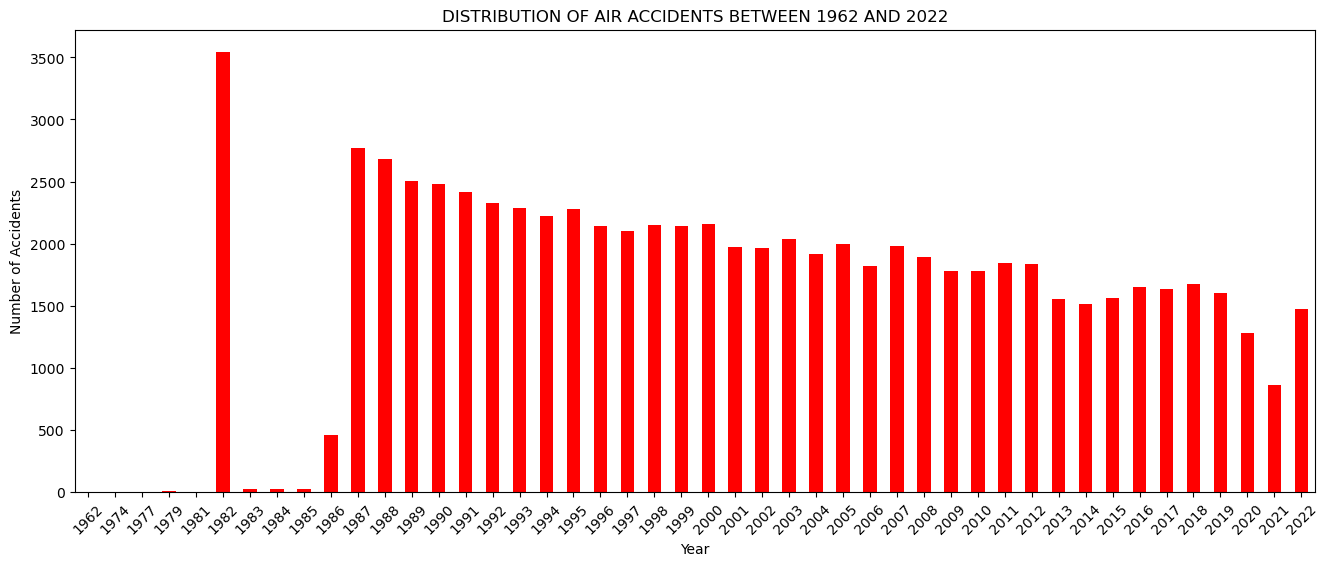

In [1070]:
# Extracting year from 'Event.Date'
df.loc[:,'Year'] = df['Event.Date'].dt.year

# Plotting the distribution of accidents over time
plt.figure(figsize=(16,6))
df['Year'].value_counts().sort_index().plot(kind='bar', color='red')
plt.title('DISTRIBUTION OF AIR ACCIDENTS BETWEEN 1962 AND 2022')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [1061]:
print(f"There has been a general decrease in the number of aircraft accidents over the years between 1962 to 2022.")

There has been a general decrease in the number of aircraft accidents over the years between 1962 to 2022.


**What types of aircraft have the highest and lowest risk based on historical accident data?**

We will need to standardize the cases on our 'Make' column in order not to avoid any confusion when carrying out our analysis.

In [1062]:
df.loc[:,'Make'] = df['Make'].str.upper()

In [1063]:
# Calculating accident and fatal injury counts per aircraft make
accident_counts = df['Make'].value_counts()
fatal_injury_counts = df.groupby('Make')['Total.Fatal.Injuries'].sum()

# Creating a DataFrame for risk assessment
risk_df = pd.DataFrame({
    'Accident Count': accident_counts,
    'Total Fatal Injuries': fatal_injury_counts
})

# Calculate Fatal Injuries per accident for different aircraft manufacturers
risk_df['Fatal Injuries per Accident'] = risk_df['Total Fatal Injuries'] / risk_df['Accident Count']

# Identifying aircraft makes with highest and lowest risks(top 10)
lowest_risk_aircraft = risk_df.nsmallest(10, 'Fatal Injuries per Accident')
highest_risk_aircraft = risk_df.nlargest(10, 'Fatal Injuries per Accident')

print("Lowest Risk Aircraft:")
print(lowest_risk_aircraft)

print("Highest Risk Aircraft:")
print(highest_risk_aircraft)

Lowest Risk Aircraft:
                     Accident Count  Total Fatal Injuries  \
Make                                                        
1200                              1                   0.0   
177MF LLC                         1                   0.0   
1977 COLFER-CHAN                  1                   0.0   
2001 MCGIRL                       1                   0.0   
2003 NASH                         1                   0.0   
2007 SAVAGE AIR LLC               1                   0.0   
2021FX3 LLC                       2                   0.0   
5 RIVERS LLC                      1                   0.0   
67 FLYING DUTCHMAN                1                   0.0   
737                               2                   0.0   

                     Fatal Injuries per Accident  
Make                                              
1200                                         0.0  
177MF LLC                                    0.0  
1977 COLFER-CHAN                         

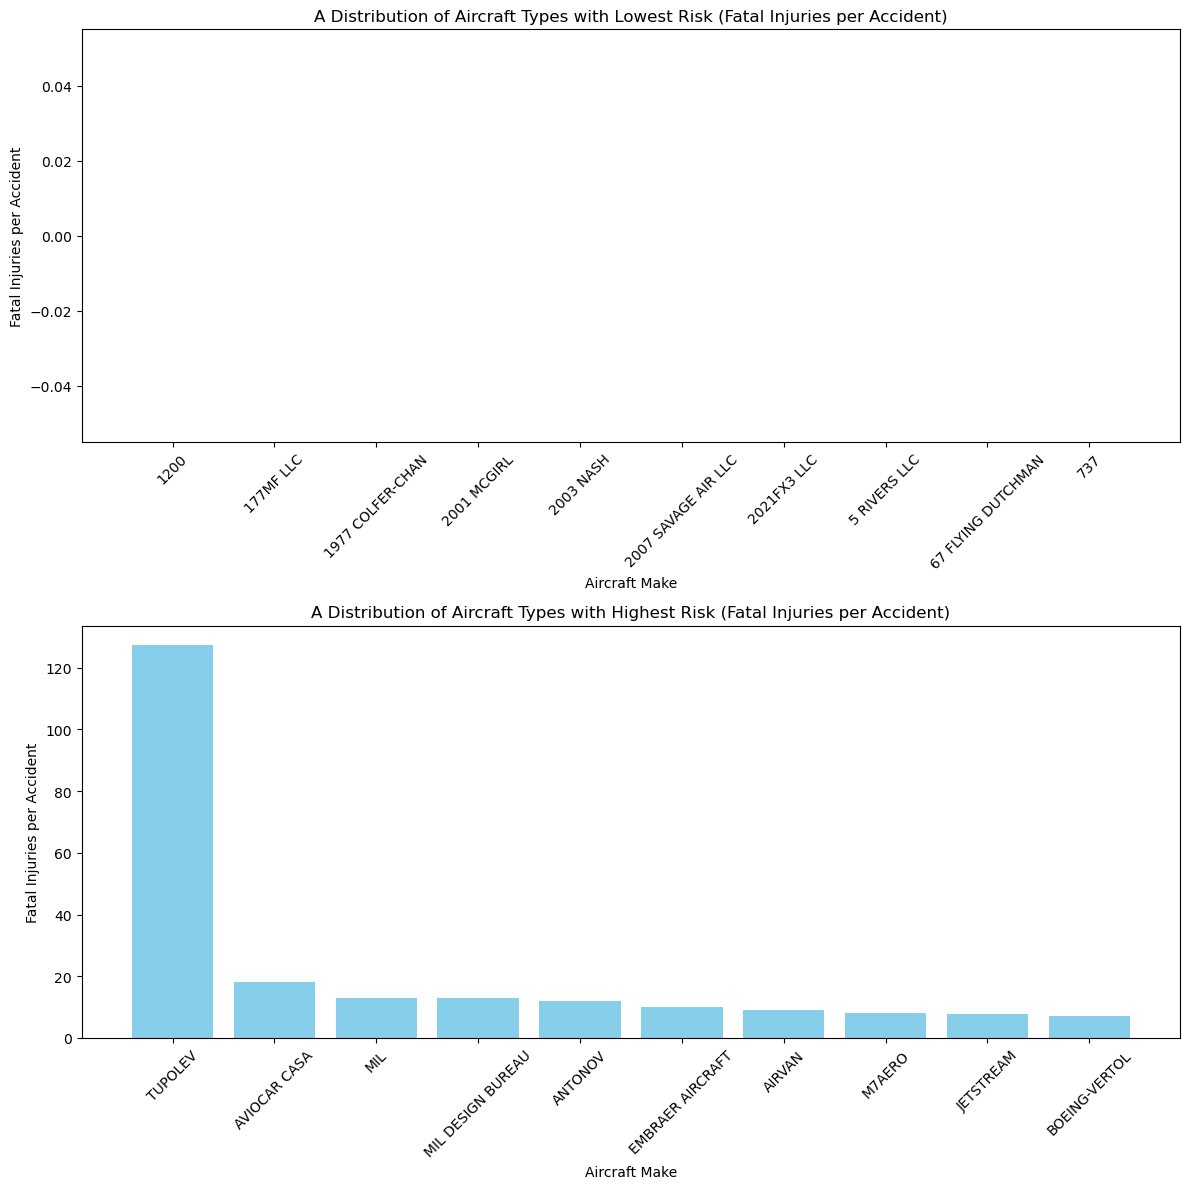

In [1064]:
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plotting lowest risk aircraft
axs[0].bar(lowest_risk_aircraft.index, lowest_risk_aircraft['Fatal Injuries per Accident'], color='green')
axs[0].set_title('A Distribution of Aircraft Types with Lowest Risk (Fatal Injuries per Accident)')
axs[0].set_xlabel('Aircraft Make')
axs[0].set_ylabel('Fatal Injuries per Accident')
axs[0].tick_params(axis='x', rotation=45)

# Plotting highest risk aircraft
axs[1].bar(highest_risk_aircraft.index, highest_risk_aircraft['Fatal Injuries per Accident'], color='skyblue')
axs[1].set_title('A Distribution of Aircraft Types with Highest Risk (Fatal Injuries per Accident)')
axs[1].set_xlabel('Aircraft Make')
axs[1].set_ylabel('Fatal Injuries per Accident')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Factors Contributing to Aviation Accidents**

We investigate aircraft accident numbers by the `Weather Condition.`

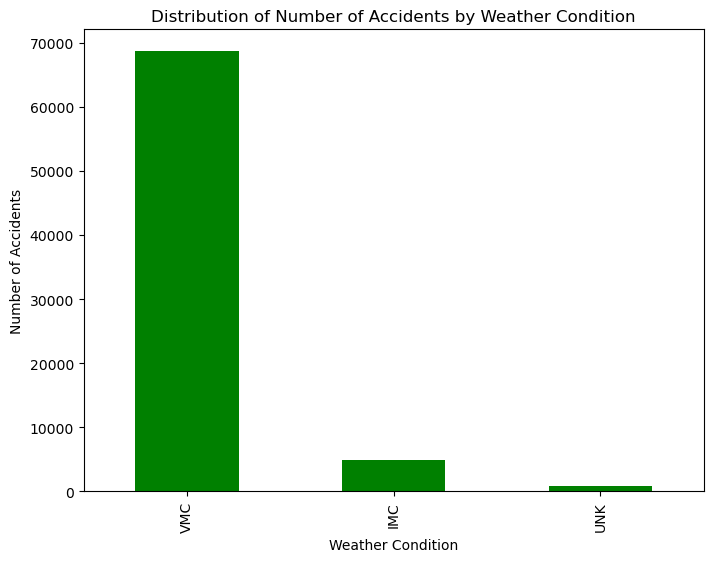

In [1065]:
# Count the number of accidents by weather condition
weather_conditions = df['Weather.Condition'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
weather_conditions.plot(kind='bar', color='green')
plt.title('Distribution of Number of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()

We will also investigate air accidents depending on the `phase of flight` as our next factor in consideration.


In [1066]:
df['Broad.phase.of.flight'].dtype

CategoricalDtype(categories=['Approach', 'Climb', 'Cruise', 'Descent', 'Go-around',
                  'Landing', 'Maneuvering', 'Other', 'Standing', 'Takeoff',
                  'Taxi', 'Unknown'],
, ordered=False, categories_dtype=object)

In [1067]:
# Removing nan values from the column
df.loc[:,'Broad.phase.of.flight']= df['Broad.phase.of.flight'].replace('nan', np.nan)

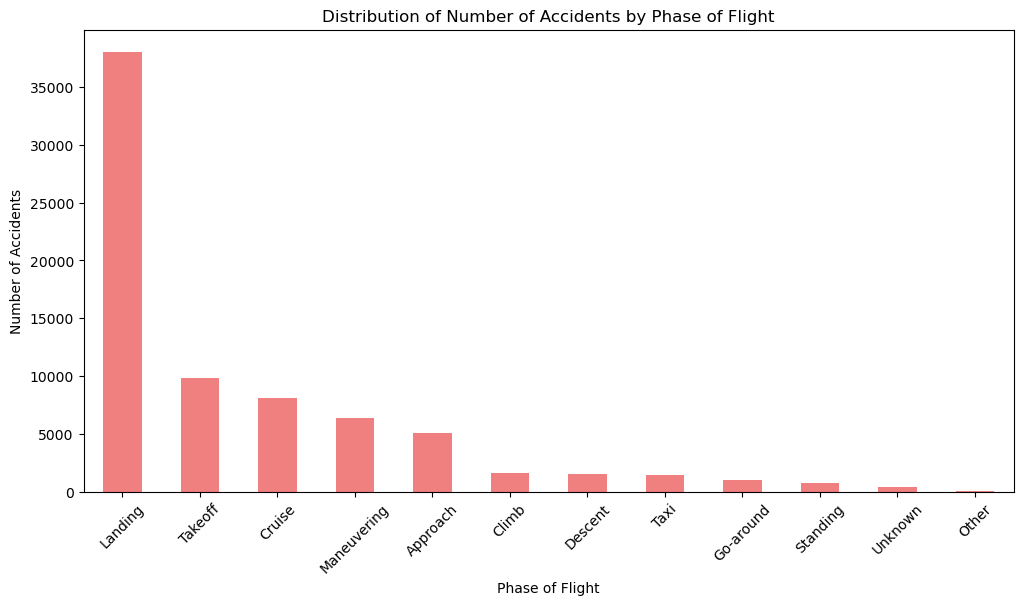

In [1068]:
# Count the number of accidents by broad phase of flight
phases_of_flight = df['Broad.phase.of.flight'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
phases_of_flight.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Number of Accidents by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

_**Findings**_

The distributions above show us that generally,
* Most of the aircraft accidents are brought about due to VMC weather conditions.
* Most of the aviation accidents occur during the landing phase of flight.

**Other key visualizations**

Below,  we will create visuals for the top 10 aircraft manufacturer's with majority of the air accidents as well as those with the highest number of fatalities.

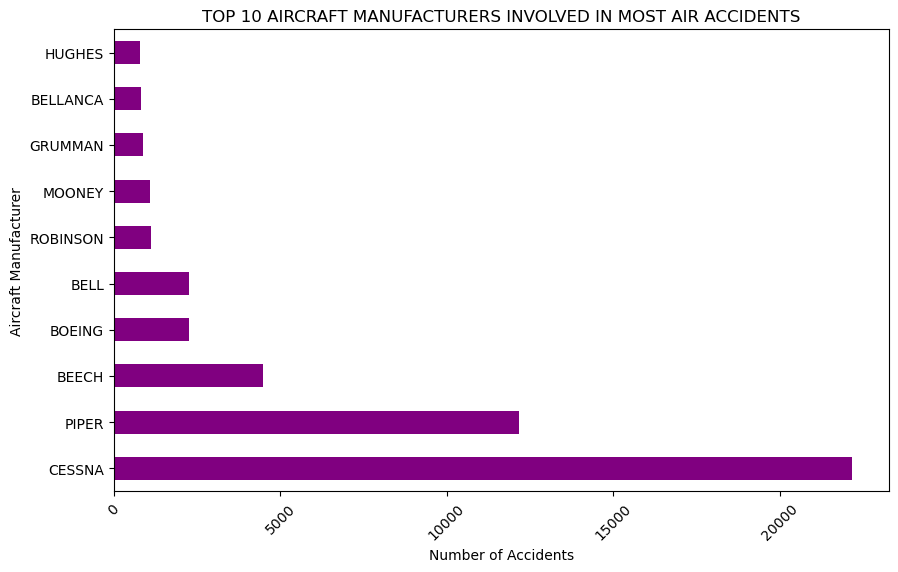

In [1069]:
aircraft_accidents = df['Make'].value_counts().sort_values(ascending = False).head(10)
aircraft_accidents

plt.figure(figsize =(10,6))
aircraft_accidents.plot(kind = 'barh', color = 'purple')
plt.title('TOP 10 AIRCRAFT MANUFACTURERS INVOLVED IN MOST AIR ACCIDENTS')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Manufacturer')
plt.xticks(rotation = 45)
plt.show()


_**Findings**_

Through the visualization created above we can say that the manufacturer `CESSNA` leads with the most number of accidents.

###  SUMMARY